In [22]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy import stats
from math import sqrt
import matplotlib.pyplot as plt

In [26]:
import numpy as np

# Ваша выборка данных
data = [3.7, 3.85, 3.71, 3.78, 3.6, 4.45, 4.2, 3.87, 3.33, 3.76, 3.75, 4.03, 3.75, 4.18, 3.8, 4.75, 3.25, 4.1, 3.55, 3.35, 3.38, 3.3, 4.15, 3.95, 3.5, 3.88, 3.72, 3.15, 4.15, 3.81, 4.22, 3.75, 3.58, 3.55, 4.08, 4.03, 3.24, 4.05, 3.56, 3.05, 3.58, 3.98, 3.78, 4.05, 3.40, 3.80, 3.067, 4.38, 4.20, 3.88]

# Уровень доверия (например, 95%)
confidence_level = 0.95

# Вычисление среднего значения и стандартной ошибки среднего
mean = np.mean(data)
std_dev = np.std(data)

# Размер выборки
sample_size = len(data)

# Вычисление стандартной ошибки среднего
standard_error = std_dev / np.sqrt(sample_size)

# Значение Z-критерия для уровня доверия 95%
z_value = 1.96

# Вычисление доверительного интервала
margin_of_error = (z_value * std_dev) / np.sqrt(sample_size)
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

print("Среднее значение:", mean)
print("Доверительный интервал 95% для среднего:", confidence_interval)


Среднее значение: 3.7795399999999995
Доверительный интервал 95% для среднего: (3.6788894032083816, 3.8801905967916173)


In [21]:
count=0
for i in data:
    if i>=3.677869411795495 and i<=3.881210588204504:
        count+=1
print("Количество элементов массива, попадающие в интервал",count)
print("Процент элементов массива, попадающие в интервал",count/(len(data)*0.01))

Количество элементов массива, попадающие в интервал 16
Процент элементов массива, попадающие в интервал 32.0


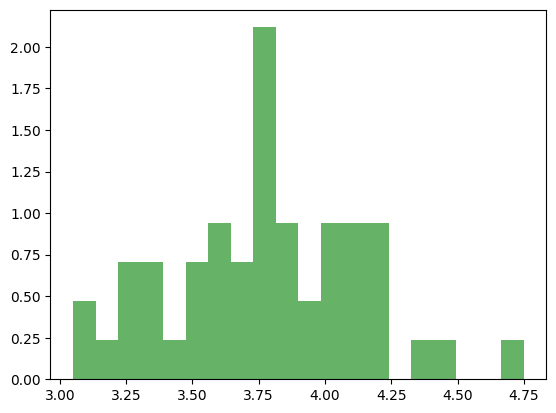

In [24]:
plt.hist(data, bins=20, density=True, alpha=0.6, color='g', label='Гистограмма веса')
plt.show()

In [25]:
from scipy import stats

data = [3.7, 3.85, 3.71, 3.78, 3.6, 4.45, 4.2, 3.87, 3.33, 3.76, 3.75, 4.03, 3.75, 4.18, 3.8, 4.75, 3.25, 4.1, 3.55, 3.35, 3.38, 3.3, 4.15, 3.95, 3.5, 3.88, 3.72, 3.15, 4.15, 3.81, 4.22, 3.75, 3.58, 3.55, 4.08, 4.03, 3.24, 4.05, 3.56, 3.05, 3.58, 3.98, 3.78, 4.05, 3.40, 3.80, 3.067, 4.38, 4.20, 3.88]

# Выполняем тест Шапиро-Уилка
statistic, p_value = stats.shapiro(data)

# Выводим результаты теста
print("Статистика теста:", statistic)
print("p-значение:", p_value)

# Проверяем нулевую гипотезу
if p_value > 0.05:
    print("Не отвергаем нулевую гипотезу: данные могут быть нормально распределены.")
else:
    print("Отвергаем нулевую гипотезу: данные не являются нормально распределенными.")


Статистика теста: 0.9865884184837341
p-значение: 0.8371606469154358
Не отвергаем нулевую гипотезу: данные могут быть нормально распределены.


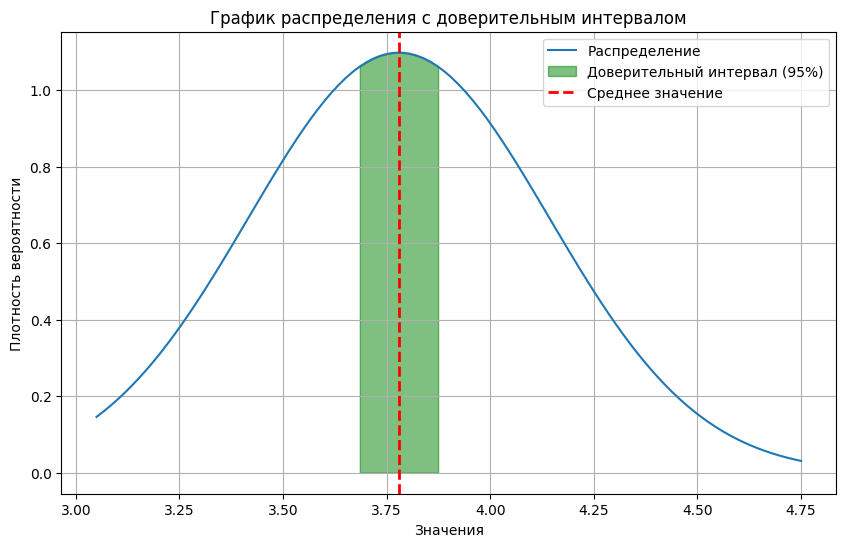

In [27]:
# Создаем массив значений для построения графика
x = np.linspace(min(data), max(data), 100)
# Создаем нормальное распределение с параметрами среднего значения и стандартной ошибки
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)

# Строим график распределения
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Распределение')
plt.fill_between(x, 0, y, where=(x >= confidence_interval[0]) & (x <= confidence_interval[1]), alpha=0.5, color='green', label='Доверительный интервал (95%)')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Среднее значение')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.title('График распределения с доверительным интервалом')
plt.legend()
plt.grid(True)
plt.show()

Можно утверждать, что выборочное среднее веса младенцев будет принадлежать данному интервалу